In [5]:
#supress warnings
import warnings

warnings.filterwarnings('ignore')

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import xticks


In [7]:
df = pd.DataFrame(pd.read_csv("./insurance.csv"))

In [8]:
df.head()

,Patient_Id,age,sex,bmi,children,smoker,region,charges
0,1,19,female,27.900,0,yes,southwest,16884.92400
1,2,18,male,33.770,1,no,southeast,1725.55230
2,3,28,male,33.000,3,no,southeast,4449.46200
3,4,33,male,22.705,0,no,northwest,21984.47061
4,5,32,male,28.880,0,no,northwest,3866.85520


In [9]:
df.columns

Index(['Patient_Id', 'age', 'sex', 'bmi', 'children', 'smoker', 'region',
       'charges'],
      dtype='object')

In [10]:
#Data inspection
df.shape

(1338, 8)

In [11]:
df.describe()

,Patient_Id,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,669.500000,39.207025,30.663397,1.094918,13270.422265
std,386.391641,14.049960,6.098187,1.205493,12110.011237
min,1.000000,18.000000,15.960000,0.000000,1121.873900
25%,335.250000,27.000000,26.296250,0.000000,4740.287150
50%,669.500000,39.000000,30.400000,1.000000,9382.033000
75%,1003.750000,51.000000,34.693750,2.000000,16639.912515
max,1338.000000,64.000000,53.130000,5.000000,63770.428010


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Patient_Id  1338 non-null   int64  
 1   age         1338 non-null   int64  
 2   sex         1338 non-null   object 
 3   bmi         1338 non-null   float64
 4   children    1338 non-null   int64  
 5   smoker      1338 non-null   object 
 6   region      1338 non-null   object 
 7   charges     1338 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 83.8+ KB


In [13]:
#Data cleaning
sum(df.duplicated(subset='Patient_Id')) == 0

True

In [14]:
#Checking null values
df.isnull().sum() * 100 / df.shape[0]

Patient_Id    0.0
age           0.0
sex           0.0
bmi           0.0
children      0.0
smoker        0.0
region        0.0
charges       0.0
dtype: float64

In [15]:
#EDA Univariate analysis
#Charges is target variable
df.charges.describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

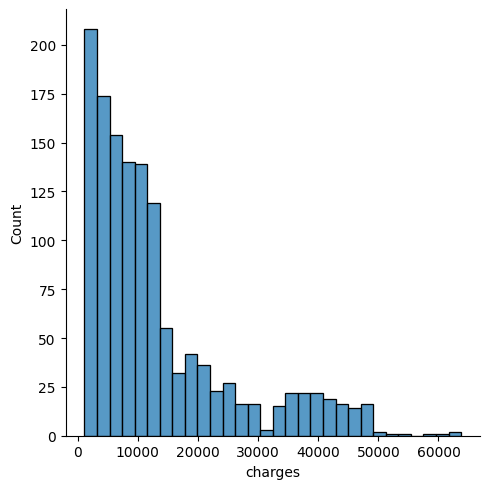

In [16]:
sns.displot(df['charges'])
plt.show()

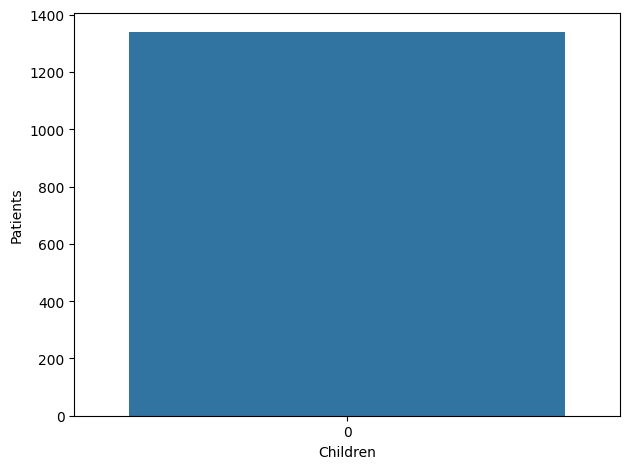

In [27]:
plt1 = sns.countplot(df['children'])
plt1.set(xlabel='Children', ylabel='Patients')
plt.tight_layout()
plt.show()

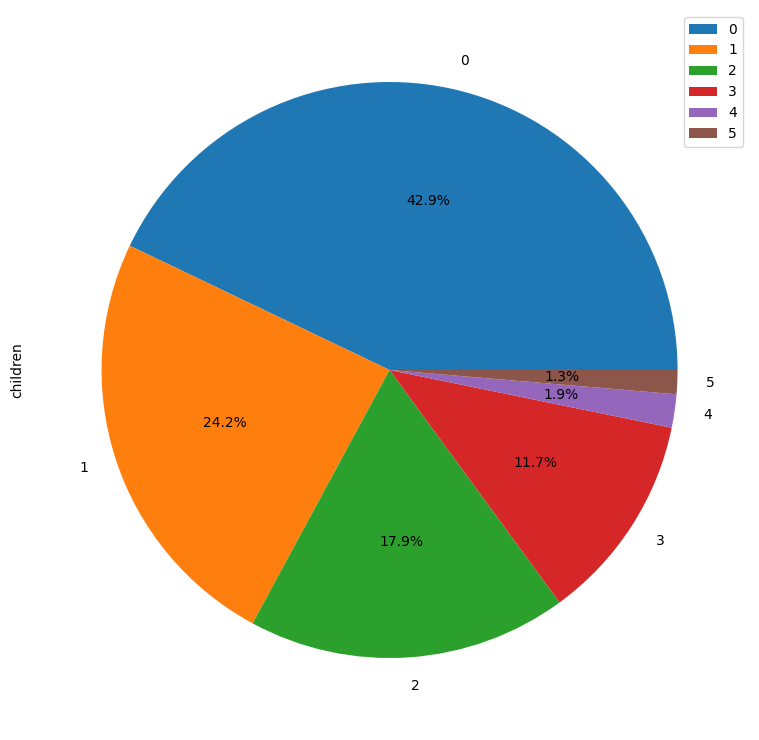

In [18]:
df_sym = pd.DataFrame(df['children'].value_counts())
df_sym.plot.pie(subplots=True,
                labels=df_sym.index.values,
                autopct='%1.1f%%',
                figsize=(15, 7.5))
# Unsquish the pie.
plt.gca().set_aspect('equal')
plt.tight_layout()
plt.show()

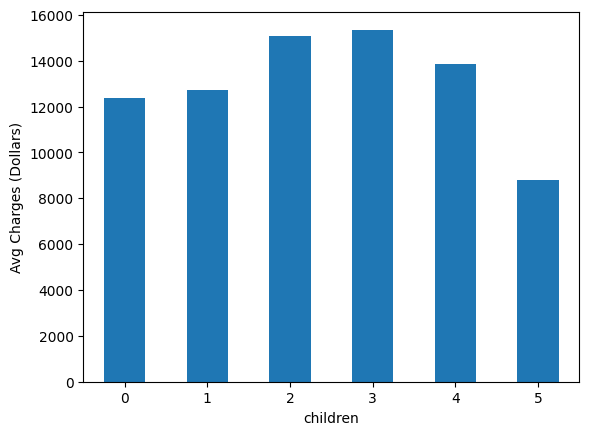

In [25]:
plt1 = df[['children', 'charges']].groupby("children").mean().plot(
    kind='bar',
    legend=False,
)
plt1.set_xlabel("children")
plt1.set_ylabel("Avg Charges (Dollars)")
xticks(rotation=0)
plt.show()
